# REPRODUCIBILITY CHALLENGE - LOVE
Here we provide the code which enabled us to reproduce the claims of the following paper: [Imputing Out-of-Vocabulary Embeddings with LOVE Makes Language Models Robust with Little Cost](https://aclanthology.org/2022.acl-long.245/).

To run this code, please load the 'LOVE-master' folder into your google drive (make sure to upload it in the main directory of your drive, and to name it 'LOVE-master').

In order to reproduce the main claims of the paper, we performed the following analysis:


1.   Intrinsic Task evaluation (Table 2 of the paper)
2.   Extrinsic Task evaluation (with and without typos, Table 3 of the paper)
3.   Robust evaluation on text classification and NER under simulated post-OCR typos (Table 4 of the paper)



In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Install required packages
!pip install pytorch-metric-learning &> /dev/null
!pip install nlpaug &> /dev/null

In [2]:
# Import useful libraries
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# INTRINSIC TASK EVALUATION
We will now run the intrinsic evaluation, in order to replicate the results of Table 2. We need to carry out the analysis of WORD SIMILARITY for the following datasets:

*   RareWord
*   SimLex
*   MTurk
*   MEN
*   WordSim
*   SimVerb





In [ ]:
%cd /content/gdrive/MyDrive/LOVE-master/
print("RESULTS FOR INTRINSIC TASKS")
!python evaluate.py

/content/gdrive/MyDrive/LOVE-master
RESULTS FOR INTRINSIC TASKS
Namespace(att_head_num=1, batch_size=32, dataset='data/wiki_100.vec', drop_rate=0.1, emb_dim=300, encoder_layer=1, epochs=20, gamma=0.97, hard_neg_numbers=3, hard_neg_path='data/hard_neg_samples.txt', input_type='mixed', learning_rate=0.002, loader_type='hard', loss_type='ntx', lowercase=True, merge=True, model_type='pam', shuffle=True, vocab_path='data/vocab.txt', vocab_size=21257)
loaded! Word num = 5497
in total, LOVE has 6667564 parameters
[RareWord]: [plugin], 42.6476207426462 
[MEN  ]: [plugin], 68.47817564155645 
[SimLex]: [plugin], 35.02258000865248 
[rel353]: [plugin], 55.8950046345804 
[simverb]: [plugin], 28.723267253298644 
[muturk]: [plugin], 63.77020916555088 


# EXTRINSIC TASK EVALUATION

In this section, you can observe the results of our extrinsic evaluation analysis, with the aim of reproducing the results of Table 3 for the following tasks:

* Text Classification 
* Named Entity Recognition

---

For each dataset, we have provided a 'corrupted' version it: each word belonging to the dataset was currupted with a typo probability of 70% (for a better understanding of the corruption mechanism, please read section 5.5 and C.2 of the appendix). This *corruption mechanism* can be reproduced through the script *corrupt_dataset/corrupt_CNN.py* and *corrupt_dataset/corrupt_Ner.py*.

## TEXT CLASSIFICATION
We analyzed the performance of LOVE for the following datasets:


1.   SST2
2.   MR

### SST2 EVALUATION
Dataset : SST2 - we need to run the analysis for 5 different learning rates

In [ ]:
%cd /content/gdrive/MyDrive/LOVE-master/extrinsic/cnn_text_classification
lr = [5e-4, 8e-4, 1e-3, 3e-3, 5e-3]
for learning_rate in lr:
  !python main.py --train_path='evaluation/SST2_dataset/train.tsv' --test_path='evaluation/SST2_dataset/test.tsv' --dev_path='evaluation/SST2_dataset/dev.tsv' --lr={learning_rate} --epoch=5

/content/gdrive/MyDrive/LOVE-master/extrinsic/cnn_text_classification
load word embedding, size = 16188
embedding word size = 16188
in total, 3 words do not have embeddings
{'<unk>', '<pad>', '<sep>'}
epoch = 5
Epoch: 01 | Epoch Time: 0m 11s
	Train Loss: 0.672 | Train Acc: 59.71%
	 Val. Loss: 0.635 |  Val. Acc: 69.15%
Epoch: 02 | Epoch Time: 0m 9s
	Train Loss: 0.595 | Train Acc: 70.81%
	 Val. Loss: 0.558 |  Val. Acc: 73.40%
Epoch: 03 | Epoch Time: 0m 9s
	Train Loss: 0.519 | Train Acc: 75.55%
	 Val. Loss: 0.519 |  Val. Acc: 75.26%
Epoch: 04 | Epoch Time: 0m 10s
	Train Loss: 0.466 | Train Acc: 78.85%
	 Val. Loss: 0.499 |  Val. Acc: 76.23%
Epoch: 05 | Epoch Time: 0m 9s
	Train Loss: 0.427 | Train Acc: 81.34%
	 Val. Loss: 0.489 |  Val. Acc: 76.12%
	-------------------------------------------------------------
	Test Loss: 0.473 | Test Acc: 79.13%
	-------------------------------------------------------------
load word embedding, size = 16188
embedding word size = 16188
in total, 3 words do n

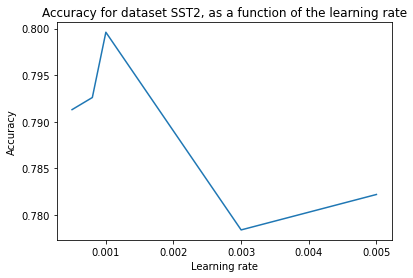

The best accuracy is : 79.96 %


In [ ]:
# Here is the accuracy on the test set for SST2 (as the best one of the above)
lr = [5e-4, 8e-4, 1e-3, 3e-3, 5e-3]
test_acc = [0.7913, 0.7926, 0.7996, 0.7784, 0.7822]
plt.plot(lr, test_acc)
plt.title('Accuracy for dataset SST2, as a function of the learning rate')
plt.ylabel('Accuracy')
plt.xlabel('Learning rate')
plt.show()
print("The best accuracy is :", max(test_acc)*100, '%')

### SST2 TYPO EVALUATION
Dataset : SST2 - we need to run the analysis for 5 different learning rates with a 'corrupted' dataset (with a 70% typo probability)

In [ ]:
lr = [5e-4, 8e-4, 1e-3, 3e-3, 5e-3]
%cd /content/gdrive/MyDrive/LOVE-master/extrinsic/cnn_text_classification
for learning_rate in lr:
  !python main.py --train_path='evaluation/SST2_dataset/corrupted/train_corr.tsv' --test_path='evaluation/SST2_dataset/corrupted/test_corr.tsv' --dev_path='evaluation/SST2_dataset/corrupted/dev_corr.tsv' --lr={learning_rate} --epoch=5

/content/gdrive/MyDrive/LOVE-master/extrinsic/cnn_text_classification
load word embedding, size = 16188
embedding word size = 16188
in total, 3 words do not have embeddings
{'<sep>', '<unk>', '<pad>'}
epoch = 5
Epoch: 01 | Epoch Time: 0m 11s
	Train Loss: 0.683 | Train Acc: 56.04%
	 Val. Loss: 0.663 |  Val. Acc: 65.04%
Epoch: 02 | Epoch Time: 0m 11s
	Train Loss: 0.652 | Train Acc: 62.91%
	 Val. Loss: 0.630 |  Val. Acc: 67.82%
Epoch: 03 | Epoch Time: 0m 11s
	Train Loss: 0.616 | Train Acc: 66.76%
	 Val. Loss: 0.604 |  Val. Acc: 69.31%
Epoch: 04 | Epoch Time: 0m 10s
	Train Loss: 0.579 | Train Acc: 70.42%
	 Val. Loss: 0.587 |  Val. Acc: 68.06%
Epoch: 05 | Epoch Time: 0m 11s
	Train Loss: 0.550 | Train Acc: 73.04%
	 Val. Loss: 0.575 |  Val. Acc: 69.87%
	-------------------------------------------------------------
	Test Loss: 0.570 | Test Acc: 70.17%
	-------------------------------------------------------------
load word embedding, size = 16188
embedding word size = 16188
in total, 3 words d

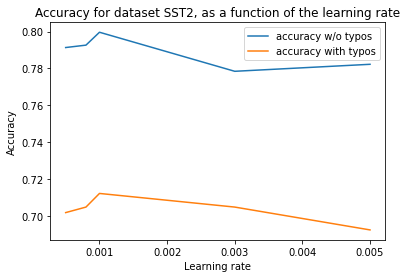

The best accuracy with typos is : 71.21 %


In [ ]:
# Here is the accuracy on the test set for SST2 with typos (as the best one of the above)
lr = [5e-4, 8e-4, 1e-3, 3e-3, 5e-3]
test_acc = [0.7913, 0.7926, 0.7996, 0.7784, 0.7822]
test_acc_typos = [0.7017, 0.7047, 0.7121, 0.7047, 0.6923]
plt.plot(lr, test_acc)
plt.plot(lr, test_acc_typos)
plt.legend(['accuracy w/o typos','accuracy with typos'])
plt.title('Accuracy for dataset SST2, as a function of the learning rate')
plt.ylabel('Accuracy')
plt.xlabel('Learning rate')
plt.show()
print("The best accuracy with typos is :", max(test_acc_typos)*100, '%')

### MR EVALUATION
Dataset : MR - we need to run the analysis for 5 different learning rates. Note that we provide the **formatted** dataset splitted into train, test and validation sets: this procedure was made through the script *MR_dataset/formatting/format.py* (this was necessary, since the original dataset was not properly formatted).

In [ ]:
%cd /content/gdrive/MyDrive/LOVE-master/extrinsic/cnn_text_classification
lr = [5e-4, 8e-4, 1e-3, 3e-3, 5e-3]
for learning_rate in lr:
  !python main.py --train_path='evaluation/MR_dataset/train.txt' --test_path='evaluation/MR_dataset/test.txt' --dev_path='evaluation/MR_dataset/dev.txt' --lr={learning_rate} --epoch=5

/content/gdrive/MyDrive/LOVE-master/extrinsic/cnn_text_classification
load word embedding, size = 16188
embedding word size = 16188
in total, 3 words do not have embeddings
{'<pad>', '<unk>', '<sep>'}
epoch = 5
Epoch: 01 | Epoch Time: 0m 13s
	Train Loss: 0.675 | Train Acc: 59.81%
	 Val. Loss: 0.644 |  Val. Acc: 68.15%
Epoch: 02 | Epoch Time: 0m 12s
	Train Loss: 0.616 | Train Acc: 68.24%
	 Val. Loss: 0.584 |  Val. Acc: 71.73%
Epoch: 03 | Epoch Time: 0m 12s
	Train Loss: 0.554 | Train Acc: 73.05%
	 Val. Loss: 0.544 |  Val. Acc: 73.27%
Epoch: 04 | Epoch Time: 0m 12s
	Train Loss: 0.511 | Train Acc: 75.59%
	 Val. Loss: 0.537 |  Val. Acc: 71.75%
Epoch: 05 | Epoch Time: 0m 12s
	Train Loss: 0.481 | Train Acc: 77.60%
	 Val. Loss: 0.516 |  Val. Acc: 74.27%
	-------------------------------------------------------------
	Test Loss: 0.534 | Test Acc: 72.84%
	-------------------------------------------------------------
load word embedding, size = 16188
embedding word size = 16188
in total, 3 words d

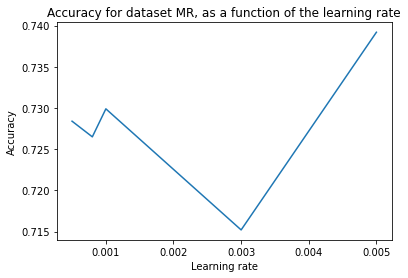

The best accuracy is : 73.92 %


In [ ]:
# Here is the accuracy on the test set for MR (as the best one of the above)
lr = [5e-4, 8e-4, 1e-3, 3e-3, 5e-3]
test_acc = [0.7284, 0.7265, 0.7299, 0.7152, 0.7392]
plt.plot(lr, test_acc)
plt.title('Accuracy for dataset MR, as a function of the learning rate')
plt.ylabel('Accuracy')
plt.xlabel('Learning rate')
plt.show()
print("The best accuracy is :", max(test_acc)*100, '%')

### MR TYPO EVALUATION
Dataset : MR - we need to run the analysis for 5 different learning rates with a 'corrupted' dataset (with a 70% typo probability)

In [ ]:
lr = [5e-4, 8e-4, 1e-3, 3e-3, 5e-3]
%cd /content/gdrive/MyDrive/LOVE-master/extrinsic/cnn_text_classification
for learning_rate in lr:
  !python main.py --train_path='evaluation/MR_dataset/corrupted/train_corr.txt' --test_path='evaluation/MR_dataset/corrupted/test_corr.txt' --dev_path='evaluation/MR_dataset/corrupted/dev_corr.txt' --lr={learning_rate} --epoch=5

/content/gdrive/MyDrive/LOVE-master/extrinsic/cnn_text_classification
load word embedding, size = 16188
embedding word size = 16188
in total, 3 words do not have embeddings
{'<unk>', '<sep>', '<pad>'}
epoch = 5
Epoch: 01 | Epoch Time: 0m 13s
	Train Loss: 0.684 | Train Acc: 56.00%
	 Val. Loss: 0.675 |  Val. Acc: 57.98%
Epoch: 02 | Epoch Time: 0m 13s
	Train Loss: 0.659 | Train Acc: 61.69%
	 Val. Loss: 0.649 |  Val. Acc: 62.47%
Epoch: 03 | Epoch Time: 0m 13s
	Train Loss: 0.628 | Train Acc: 65.67%
	 Val. Loss: 0.628 |  Val. Acc: 65.28%
Epoch: 04 | Epoch Time: 0m 13s
	Train Loss: 0.601 | Train Acc: 69.02%
	 Val. Loss: 0.621 |  Val. Acc: 64.75%
Epoch: 05 | Epoch Time: 0m 12s
	Train Loss: 0.578 | Train Acc: 70.58%
	 Val. Loss: 0.606 |  Val. Acc: 65.27%
	-------------------------------------------------------------
	Test Loss: 0.638 | Test Acc: 63.97%
	-------------------------------------------------------------
load word embedding, size = 16188
embedding word size = 16188
in total, 3 words d

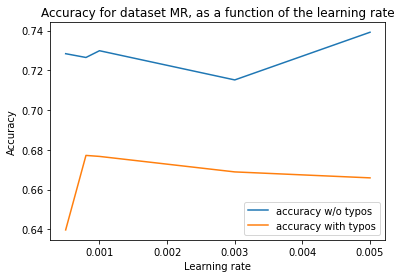

The average accuracy with typos is : 66.568 %


In [ ]:
# Here is the accuracy on the test set for MR with typos (as the best one of the above)
lr = [5e-4, 8e-4, 1e-3, 3e-3, 5e-3]
test_acc = [0.7284, 0.7265, 0.7299, 0.7152, 0.7392]
test_acc_typos = [0.6397, 0.6772, 0.6767, 0.6689, 0.6659]
plt.plot(lr, test_acc)
plt.plot(lr, test_acc_typos)
plt.legend(['accuracy w/o typos','accuracy with typos'])
plt.title('Accuracy for dataset MR, as a function of the learning rate')
plt.ylabel('Accuracy')
plt.xlabel('Learning rate')
plt.show()
print("The best accuracy with typos is :", max(test_acc_typos)*100, '%')

## NAMED ENTITY RECOGNITION
We analyzed the performance of LOVE for the following datasets:

1.   CONLL-03
2.   BC2GM

### CONLL-03 EVALUATION
Dataset : CONLL-03 - we need to run the analysis for 5 different learning rates

In [ ]:
%cd /content/gdrive/MyDrive/LOVE-master/extrinsic/rnn_ner/
!chmod 777 evaluation/conlleval
!python main.py --train_path='evaluation/CONLL-03/train.txt' --test_path='evaluation/CONLL-03/test.txt' --dev_path='evaluation/CONLL-03/valid.txt' --lr=5e-4

/content/gdrive/MyDrive/LOVE-master/extrinsic/rnn_ner
Embedding:
     pretrain word:21892, prefect match:12231, case_match:13075, oov:0, oov%:0.0
use_crf: True
emb dim: 300
build CRF...
train begin --------------------------------------------------


2022-11-26 06:52:57.563822: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
train 1/100 epoch
 Learning rate is set as: 0.0005
/content/gdrive/MyDrive/LOVE-master/extrinsic/rnn_ner/crf.py:159: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/cuda/Indexing.cu:1239.)
  cur_bp.masked_fill_(mask[idx].view(batch_size, 1).expand(batch_size, tag_size), 0)
processed 51578 tokens with 5942

In [ ]:
%cd /content/gdrive/MyDrive/LOVE-master/extrinsic/rnn_ner/
!python main.py --train_path='evaluation/CONLL-03/train.txt' --test_path='evaluation/CONLL-03/test.txt' --dev_path='evaluation/CONLL-03/valid.txt' --lr=8e-4

/content/gdrive/MyDrive/LOVE-master/extrinsic/rnn_ner
Embedding:
     pretrain word:21892, prefect match:12231, case_match:13075, oov:0, oov%:0.0
use_crf: True
emb dim: 300
build CRF...
train begin --------------------------------------------------


2022-11-26 07:24:27.201904: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
train 1/100 epoch
 Learning rate is set as: 0.0008
/content/gdrive/MyDrive/LOVE-master/extrinsic/rnn_ner/crf.py:159: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/cuda/Indexing.cu:1239.)
  cur_bp.masked_fill_(mask[idx].view(batch_size, 1).expand(batch_size, tag_size), 0)
processed 51578 tokens with 5942

In [ ]:
%cd /content/gdrive/MyDrive/LOVE-master/extrinsic/rnn_ner/
!python main.py --train_path='evaluation/CONLL-03/train.txt' --test_path='evaluation/CONLL-03/test.txt' --dev_path='evaluation/CONLL-03/valid.txt' --lr=1e-3

/content/gdrive/MyDrive/LOVE-master/extrinsic/rnn_ner
Embedding:
     pretrain word:21892, prefect match:12231, case_match:13075, oov:0, oov%:0.0
use_crf: True
emb dim: 300
build CRF...
train begin --------------------------------------------------


2022-11-26 07:42:18.058527: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
train 1/100 epoch
 Learning rate is set as: 0.001
/content/gdrive/MyDrive/LOVE-master/extrinsic/rnn_ner/crf.py:159: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/cuda/Indexing.cu:1239.)
  cur_bp.masked_fill_(mask[idx].view(batch_size, 1).expand(batch_size, tag_size), 0)
processed 51578 tokens with 5942 

In [ ]:
%cd /content/gdrive/MyDrive/LOVE-master/extrinsic/rnn_ner/
!python main.py --train_path='evaluation/CONLL-03/train.txt' --test_path='evaluation/CONLL-03/test.txt' --dev_path='evaluation/CONLL-03/valid.txt' --lr=3e-3

/content/gdrive/MyDrive/LOVE-master/extrinsic/rnn_ner
Embedding:
     pretrain word:21892, prefect match:12231, case_match:13075, oov:0, oov%:0.0
use_crf: True
emb dim: 300
build CRF...
train begin --------------------------------------------------


2022-11-26 08:14:31.509474: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
train 1/100 epoch
 Learning rate is set as: 0.003
/content/gdrive/MyDrive/LOVE-master/extrinsic/rnn_ner/crf.py:159: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/cuda/Indexing.cu:1239.)
  cur_bp.masked_fill_(mask[idx].view(batch_size, 1).expand(batch_size, tag_size), 0)
processed 51578 tokens with 5942 

In [ ]:
%cd /content/gdrive/MyDrive/LOVE-master/extrinsic/rnn_ner/
!python main.py --train_path='evaluation/CONLL-03/train.txt' --test_path='evaluation/CONLL-03/test.txt' --dev_path='evaluation/CONLL-03/valid.txt' --lr=5e-3

/content/gdrive/MyDrive/LOVE-master/extrinsic/rnn_ner
Embedding:
     pretrain word:21892, prefect match:12231, case_match:13075, oov:0, oov%:0.0
use_crf: True
emb dim: 300
build CRF...
train begin --------------------------------------------------


2022-11-26 08:44:02.184921: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
train 1/100 epoch
 Learning rate is set as: 0.005
/content/gdrive/MyDrive/LOVE-master/extrinsic/rnn_ner/crf.py:159: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/cuda/Indexing.cu:1239.)
  cur_bp.masked_fill_(mask[idx].view(batch_size, 1).expand(batch_size, tag_size), 0)
processed 51578 tokens with 5942 

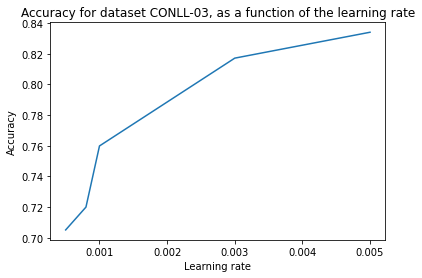

The best accuracy is : 83.41 %


In [ ]:
# Here is the accuracy on the test set for CONLL-03 (as the best one of the above)
lr = [5e-4, 8e-4, 1e-3, 3e-3, 5e-3]
test_acc = [0.7051, 0.72, 0.7599, 0.8172, 0.8341]
plt.plot(lr, test_acc)
plt.title('Accuracy for dataset CONLL-03, as a function of the learning rate')
plt.ylabel('Accuracy')
plt.xlabel('Learning rate')
plt.show()
print("The best accuracy is :", max(test_acc)*100, '%')

### CONLL-03 TYPO EVALUATION
Dataset : CONLL-03 - we need to run the analysis for 5 different learning rates with a 'corrupted' dataset (with a 70% typo probability)

In [ ]:
lr = [5e-4, 8e-4, 1e-3, 3e-3, 5e-3]
%cd /content/gdrive/MyDrive/LOVE-master/extrinsic/rnn_ner
for learning_rate in lr:
  !python main.py --train_path='evaluation/CONLL-03/corrupted/train_corr.txt' --test_path='evaluation/CONLL-03/corrupted/test_corr.txt' --dev_path='evaluation/CONLL-03/corrupted/valid_corr.txt' --lr={learning_rate}

/content/gdrive/MyDrive/LOVE-master/extrinsic/rnn_ner
Embedding:
     pretrain word:21892, prefect match:8600, case_match:8898, oov:66267, oov%:0.7911060705545275
use_crf: True
emb dim: 300
build CRF...
train begin --------------------------------------------------


train 1/100 epoch
 Learning rate is set as: 0.0005
/content/gdrive/MyDrive/LOVE-master/extrinsic/rnn_ner/crf.py:159: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/cuda/Indexing.cu:1239.)
  cur_bp.masked_fill_(mask[idx].view(batch_size, 1).expand(batch_size, tag_size), 0)
processed 51578 tokens with 5942 phrases; found: 0 phrases; correct: 0.
accuracy:  83.32%; precision:   0.00%; recall:   0.00%; FB1:   0.00
f1 is 0.0 at 1th epoch on dev set
new best f1 on dev set: 0.0
train 1th epoch cost 0m 20s

train 2/100 epoch
 Learning rate is set as: 0.0004761904761904762
processed 51

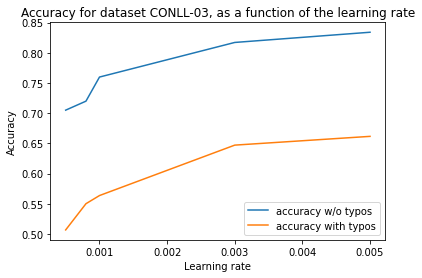

The best accuracy with typos is : 66.17 %


In [ ]:
# Here is the accuracy on the test set for CONLL-03 with typos(as the best one of the above)
lr = [5e-4, 8e-4, 1e-3, 3e-3, 5e-3]
test_acc = [0.7051, 0.72, 0.7599, 0.8172, 0.8341]
test_acc_typos = [0.5068, 0.5502, 0.5637, 0.6472, 0.6617,]
plt.plot(lr, test_acc)
plt.plot(lr, test_acc_typos)
plt.legend(['accuracy w/o typos','accuracy with typos'])
plt.title('Accuracy for dataset CONLL-03, as a function of the learning rate')
plt.ylabel('Accuracy')
plt.xlabel('Learning rate')
plt.show()
print("The best accuracy with typos is :", max(test_acc_typos)*100, '%')

### BC2GM EVALUATION
Dataset : BC2GM - we need to run the analysis for 5 different learning rates

In [ ]:
%cd /content/gdrive/MyDrive/LOVE-master/extrinsic/rnn_ner/
!chmod 777 evaluation/conlleval
lr = [5e-4, 8e-4, 1e-3, 3e-3, 5e-3]
for learning_rate in lr:
  !python main.py --train_path='evaluation/BC2GM/train.tsv' --test_path='evaluation/BC2GM/test.tsv' --dev_path='evaluation/BC2GM/dev.tsv' --lr={learning_rate}

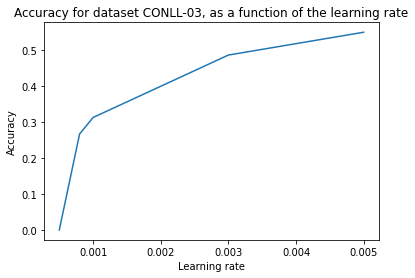

The best accuracy is : 54.94 %


In [3]:
# Here is the accuracy on the test set for BC2GM (as the best one of the above)
lr = [5e-4, 8e-4, 1e-3, 3e-3, 5e-3]
test_acc = [0., 0.2666, 0.3125, 0.486, 0.5494]
plt.plot(lr, test_acc)
plt.title('Accuracy for dataset CONLL-03, as a function of the learning rate')
plt.ylabel('Accuracy')
plt.xlabel('Learning rate')
plt.show()
print("The best accuracy is :", max(test_acc)*100, '%')

### BC2GM TYPO EVALUATION
Dataset : BC2GM - we need to run the analysis for 5 different learning rates with a 'corrupted' dataset (with a 70% typo probability)

In [4]:
lr = [5e-4, 8e-4, 1e-3, 3e-3, 5e-3]
%cd /content/gdrive/MyDrive/LOVE-master/extrinsic/rnn_ner
for learning_rate in lr:
  !python main.py --train_path='evaluation/BC2GM/corrupted/train_corr.tsv' --test_path='evaluation/BC2GM/corrupted/test_corr.tsv' --dev_path='evaluation/BC2GM/corrupted/devel_corr.tsv' --lr={learning_rate}

/content/gdrive/MyDrive/LOVE-master/extrinsic/rnn_ner
Embedding:
     pretrain word:21892, prefect match:4049, case_match:1798, oov:141689, oov%:0.9603689946860428
use_crf: True
emb dim: 300
build CRF...
train begin --------------------------------------------------


train 1/100 epoch
 Learning rate is set as: 0.0005
/content/gdrive/MyDrive/LOVE-master/extrinsic/rnn_ner/crf.py:159: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/cuda/Indexing.cu:1239.)
  cur_bp.masked_fill_(mask[idx].view(batch_size, 1).expand(batch_size, tag_size), 0)
processed 71042 tokens with 2697 phrases; found: 0 phrases; correct: 0.
accuracy:  87.89%; precision:   0.00%; recall:   0.00%; FB1:   0.00
f1 is 0.0 at 1th epoch on dev set
new best f1 on dev set: 0.0
train 1th epoch cost 0m 34s

train 2/100 epoch
 Learning rate is set as: 0.0004761904761904762
processed 7

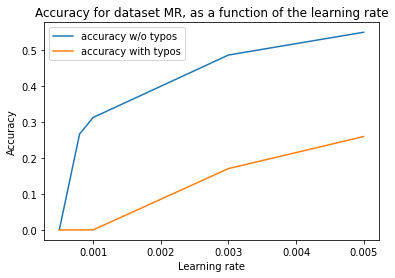

The best accuracy with typos is : 25.95 %


In [6]:
# Here is the accuracy on the test set for BC2GM with typos (as the best one of the above)
lr = [5e-4, 8e-4, 1e-3, 3e-3, 5e-3]
test_acc = [0., 0.2666, 0.3125, 0.486, 0.5494]
test_acc_typos = [0., 0., 0., 0.1704, 0.2595]
plt.plot(lr, test_acc)
plt.plot(lr, test_acc_typos)
plt.legend(['accuracy w/o typos','accuracy with typos'])
plt.title('Accuracy for dataset MR, as a function of the learning rate')
plt.ylabel('Accuracy')
plt.xlabel('Learning rate')
plt.show()
print("The best accuracy with typos is :", max(test_acc_typos)*100, '%')

# ROBUST EVALUATION
In this section we reproduced the performance of the robust evaluation - five runs on different learning rates - on text classification and NER under simulated post-OCR typos.
This analysis is carried out on two different datasets:
*   SST2
*   CONLL-03

NOTE: We carried out the analysis only for the LOVE model trained with FastText (omitting the analysis of BERT + LOVE).



## SST2 - TYPO EVALUATION
Dataset : SST2 - we need to run the analysis for different typo probabilities (10%, 30%, 50%, 70%, 90%), each with 5 different learning rates.

In [ ]:
lr = [5e-4, 8e-4, 1e-3, 3e-3, 5e-3]
%cd /content/gdrive/MyDrive/LOVE-master/extrinsic/cnn_text_classification

# 5 runs with 10% of typo probability
for learning_rate in lr:
  !python main.py --train_path='evaluation/SST2_dataset/corrupted_10/train_corr.tsv' --test_path='evaluation/SST2_dataset/corrupted_10/test_corr.tsv' --dev_path='evaluation/SST2_dataset/corrupted_10/dev_corr.tsv' --lr={learning_rate} --epoch=5

# 5 runs with 30% of typo probability
for learning_rate in lr:
  !python main.py --train_path='evaluation/SST2_dataset/corrupted_30/train_corr.tsv' --test_path='evaluation/SST2_dataset/corrupted_30/test_corr.tsv' --dev_path='evaluation/SST2_dataset/corrupted_30/dev_corr.tsv' --lr={learning_rate} --epoch=5

# 5 runs with 50% of typo probability
for learning_rate in lr:
  !python main.py --train_path='evaluation/SST2_dataset/corrupted_50/train_corr.tsv' --test_path='evaluation/SST2_dataset/corrupted_50/test_corr.tsv' --dev_path='evaluation/SST2_dataset/corrupted_50/dev_corr.tsv' --lr={learning_rate} --epoch=5

# 5 runs with 70% of typo probability
for learning_rate in lr:
  !python main.py --train_path='evaluation/SST2_dataset/corrupted/train_corr.tsv' --test_path='evaluation/SST2_dataset/corrupted/test_corr.tsv' --dev_path='evaluation/SST2_dataset/corrupted/dev_corr.tsv' --lr={learning_rate} --epoch=5

# 5 runs with 90% of typo probability
for learning_rate in lr:
  !python main.py --train_path='evaluation/SST2_dataset/corrupted_90/train_corr.tsv' --test_path='evaluation/SST2_dataset/corrupted_90/test_corr.tsv' --dev_path='evaluation/SST2_dataset/corrupted_90/dev_corr.tsv' --lr={learning_rate} --epoch=5


/content/gdrive/MyDrive/LOVE-master/extrinsic/cnn_text_classification
load word embedding, size = 16188
embedding word size = 16188
in total, 3 words do not have embeddings
{'<pad>', '<unk>', '<sep>'}
epoch = 5
Epoch: 01 | Epoch Time: 0m 10s
	Train Loss: 0.674 | Train Acc: 59.47%
	 Val. Loss: 0.639 |  Val. Acc: 68.71%
Epoch: 02 | Epoch Time: 0m 11s
	Train Loss: 0.603 | Train Acc: 70.50%
	 Val. Loss: 0.563 |  Val. Acc: 73.29%
Epoch: 03 | Epoch Time: 0m 10s
	Train Loss: 0.529 | Train Acc: 74.82%
	 Val. Loss: 0.520 |  Val. Acc: 75.71%
Epoch: 04 | Epoch Time: 0m 10s
	Train Loss: 0.476 | Train Acc: 78.70%
	 Val. Loss: 0.500 |  Val. Acc: 76.23%
Epoch: 05 | Epoch Time: 0m 10s
	Train Loss: 0.439 | Train Acc: 80.75%
	 Val. Loss: 0.488 |  Val. Acc: 76.48%
	-------------------------------------------------------------
	Test Loss: 0.472 | Test Acc: 77.94%
	-------------------------------------------------------------
load word embedding, size = 16188
embedding word size = 16188
in total, 3 words d

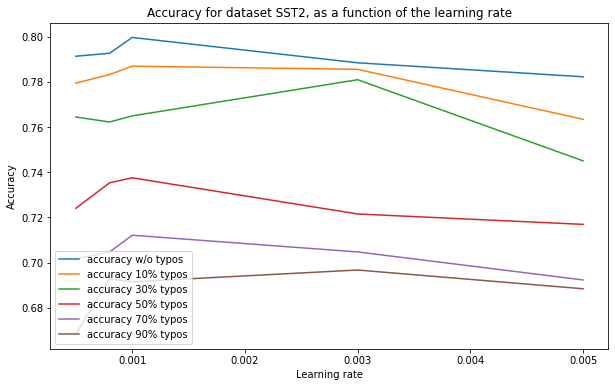

The best accuracy for 10% typo probability is : 78.69 %
The best accuracy for 30% typo probability is : 78.09 %
The best accuracy for 50% typo probability is : 73.75 %
The best accuracy for 70% typo probability is : 71.21 %
The best accuracy for 90% typo probability is : 69.67 %


In [ ]:
# Here is the accuracy on the test set for SST2 for different
# typo probabilitys 
lr = [5e-4, 8e-4, 1e-3, 3e-3, 5e-3]
test_acc = [0.7913, 0.7926, 0.7996, 0.7884, 0.7822]
test_acc_10 = [0.7794, 0.7832, 0.7869, 0.7855, 0.7634]
test_acc_30 = [0.7644, 0.7622, 0.7649, 0.7809, 0.7450]
test_acc_50 = [0.7240, 0.7353, 0.7375, 0.7215, 0.7169]
test_acc_70 = [0.7017, 0.7047, 0.7121, 0.7047, 0.6923]
test_acc_90 = [0.6684, 0.6928, 0.6915, 0.6967, 0.6884]
plt.figure(figsize=(10, 6))
plt.plot(lr, test_acc)
plt.plot(lr, test_acc_10)
plt.plot(lr, test_acc_30)
plt.plot(lr, test_acc_50)
plt.plot(lr, test_acc_70)
plt.plot(lr, test_acc_90)
plt.legend(['accuracy w/o typos','accuracy 10% typos', 'accuracy 30% typos', 'accuracy 50% typos', 'accuracy 70% typos', 'accuracy 90% typos'], loc=3)
plt.title('Accuracy for dataset SST2, as a function of the learning rate')
plt.ylabel('Accuracy')
plt.xlabel('Learning rate')
plt.show()
print("The best accuracy for 10% typo probability is :", max(test_acc_10)*100, '%')
print("The best accuracy for 30% typo probability is :", max(test_acc_30)*100, '%')
print("The best accuracy for 50% typo probability is :", max(test_acc_50)*100, '%')
print("The best accuracy for 70% typo probability is :", max(test_acc_70)*100, '%')
print("The best accuracy for 90% typo probability is :", max(test_acc_90)*100, '%')

##CONLL-03 - TYPO EVALUATION
Dataset : CONLL-03 - we need to run the analysis for different typo probabilities (10%, 30%, 50%, 70%, 90%), each with 5 different learning rates.

In [ ]:
lr = [5e-4, 8e-4, 1e-3, 3e-3, 5e-3]
%cd /content/gdrive/MyDrive/LOVE-master/extrinsic/rnn_ner

# 5 runs with 10% of typo probability
for learning_rate in lr:
  !python main.py --train_path='evaluation/CONLL-03/corrupted_10/train_corr.txt' --test_path='evaluation/CONLL-03/corrupted_10/test_corr.txt' --dev_path='evaluation/CONLL-03/corrupted_10/dev_corr.txt' --lr={learning_rate}

# 5 runs with 30% of typo probability
for learning_rate in lr:
  !python main.py --train_path='evaluation/CONLL-03/corrupted_30/train_corr.txt' --test_path='evaluation/CONLL-03/corrupted_30/test_corr.txt' --dev_path='evaluation/CONLL-03/corrupted_30/dev_corr.txt' --lr={learning_rate}

# 5 runs with 50% of typo probability
for learning_rate in lr:
  !python main.py --train_path='evaluation/CONLL-03/corrupted_50/train_corr.txt' --test_path='evaluation/CONLL-03/corrupted_50/test_corr.txt' --dev_path='evaluation/CONLL-03/corrupted_50/dev_corr.txt' --lr={learning_rate}

# 5 runs with 70% of typo probability
for learning_rate in lr:
  !python main.py --train_path='evaluation/CONLL-03/corrupted/train_corr.txt' --test_path='evaluation/CONLL-03/corrupted/test_corr.txt' --dev_path='evaluation/CONLL-03/corrupted/dev_corr.txt' --lr={learning_rate}

# 5 runs with 90% of typo probability
for learning_rate in lr:
  !python main.py --train_path='evaluation/CONLL-03/corrupted_90/train_corr.txt' --test_path='evaluation/CONLL-03/corrupted_90/test_corr.txt' --dev_path='evaluation/CONLL-03/corrupted_90/dev_corr.txt' --lr={learning_rate}

Output streaming troncato alle ultime 5000 righe.
f1 is 71.4 at 64th epoch on dev set
train 64th epoch cost 0m 19s

train 65/100 epoch
 Learning rate is set as: 0.00019047619047619048
processed 51578 tokens with 5942 phrases; found: 4775 phrases; correct: 3817.
accuracy:  93.62%; precision:  79.94%; recall:  64.24%; FB1:  71.23
f1 is 71.23 at 65th epoch on dev set
train 65th epoch cost 0m 19s

train 66/100 epoch
 Learning rate is set as: 0.00018823529411764707
processed 51578 tokens with 5942 phrases; found: 4843 phrases; correct: 3845.
accuracy:  93.65%; precision:  79.39%; recall:  64.71%; FB1:  71.30
f1 is 71.3 at 66th epoch on dev set
train 66th epoch cost 0m 18s

train 67/100 epoch
 Learning rate is set as: 0.00018604651162790697
processed 51578 tokens with 5942 phrases; found: 4798 phrases; correct: 3840.
accuracy:  93.66%; precision:  80.03%; recall:  64.62%; FB1:  71.51
f1 is 71.51 at 67th epoch on dev set
train 67th epoch cost 0m 19s

train 68/100 epoch
 Learning rate is set a

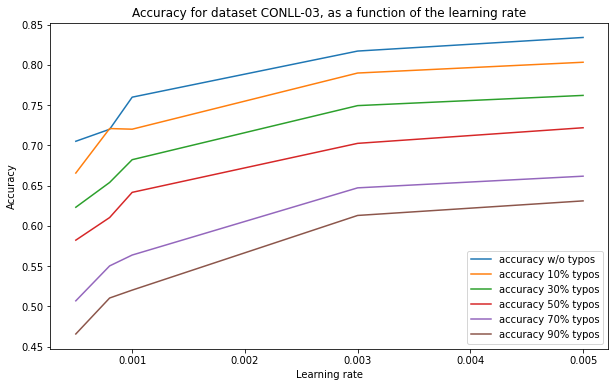

The best accuracy for 10% typo probability is : 80.33 %
The best accuracy for 30% typo probability is : 76.21 %
The best accuracy for 50% typo probability is : 72.19 %
The best accuracy for 70% typo probability is : 66.17 %
The best accuracy for 90% typo probability is : 63.1 %


In [4]:
# Here is the accuracy on the test set for CONLL-03 for different
# typo probabilitys 
lr = [5e-4, 8e-4, 1e-3, 3e-3, 5e-3]
test_acc = [0.7051, 0.72, 0.7599, 0.8172, 0.8341]
test_acc_10 = [0.6656, 0.7209, 0.7201, 0.7899, 0.8033]
test_acc_30 = [0.6231, 0.6539, 0.6822, 0.7494, 0.7621]
test_acc_50 = [0.5822, 0.6103, 0.6416, 0.7025, 0.7219]
test_acc_70 = [0.5068, 0.5502, 0.5637, 0.6472, 0.6617,]
test_acc_90 = [0.4656, 0.5103, 0.5201, 0.6129, 0.631]
plt.figure(figsize=(10, 6))
plt.plot(lr, test_acc)
plt.plot(lr, test_acc_10)
plt.plot(lr, test_acc_30)
plt.plot(lr, test_acc_50)
plt.plot(lr, test_acc_70)
plt.plot(lr, test_acc_90)
plt.legend(['accuracy w/o typos','accuracy 10% typos', 'accuracy 30% typos', 'accuracy 50% typos', 'accuracy 70% typos', 'accuracy 90% typos'])
plt.title('Accuracy for dataset CONLL-03, as a function of the learning rate')
plt.ylabel('Accuracy')
plt.xlabel('Learning rate')
plt.show()
print("The best accuracy for 10% typo probability is :", max(test_acc_10)*100, '%')
print("The best accuracy for 30% typo probability is :", max(test_acc_30)*100, '%')
print("The best accuracy for 50% typo probability is :", max(test_acc_50)*100, '%')
print("The best accuracy for 70% typo probability is :", max(test_acc_70)*100, '%')
print("The best accuracy for 90% typo probability is :", max(test_acc_90)*100, '%')